# User guide notebook - Pipeline from Converters

<strong>This notebook presents the usage of the pipelines after providing data in a specific format (for example returned by Converter class). If your data is not converted, please see other notebooks presenting the usage of the package from raw models.</strong>

<span style="color:orange">NOTE 1 : </span> It is crucial to stratify your data while performing the train test split, so that there are no classes in test data that were not present in the train set. <br>
<span style="color:orange">NOTE 2 : </span> It is crucial to convert binary target column labels into 0 for negative class and 1 for positive class. Otherwise, some evaluation metrics may not be calculated correctly.

In [ ]:
import pandas as pd
from pathlib import Path
import pickle
import sys
BASE_DIR = Path.cwd()


project_root = BASE_DIR.parent
src_path = project_root/"src"
sys.path.append(str(src_path))

#make sure the Project root directory is correct [...]/Rashomon_analysis
print(BASE_DIR.parent)

from rashomon_analysis.pipelines.builder_abstract import *
from rashomon_analysis.pipelines.pipelines_from_converters import *

C:\Users\rogal\MojGithub\ARSA-Automated-Rashomon-Set-Analysis


## Build Rashomon Set pipeline from Converter results

### Provide all necessary arguments

The Pipeline takes 3 positional arguments:
1. converter_results_path Path : Path to a folder containing all necessary files (e.g. files saved by .convert() method in any Converter). Those files are: <br>
    a.  leaderboard.csv : file containing all trained models and their evaluation metrics scores.<br>
    b. y_true.csv: target column from test dataset.<br>
    c. predictions_dict.pkl : dictionary with model names as keys and their class prediction vectors as values.<br>
    d. proba_predictions.pkl : dictionary with model names as kesy and their probabilities predictions as values.<br>
    e. (optional) feature_importance_dict.pkl : dictionary with model names as keys and their features sorted descending by their feature importace as values. <br>

2. base_metric str : name of the evaluation metric to be used while creating the Rashomon Set.<br>
3. delta float : delta parameter used in probabilistic ambiguity and discrepancy only in binary task type. Default = 0.1

In [2]:
#provide a correct path to a folder with all converter results files such as leaderboard, y_true etc.
converted_results_credit_path = project_root/"demo_converter_results"/"autogluon"/"credit"

#verify the correctness of the path
print(converted_results_credit_path)

leaderboard = pd.read_csv( converted_results_credit_path/ "leaderboard.csv")
y_true = pd.read_csv(converted_results_credit_path/ "y_true.csv")
with open(converted_results_credit_path / "predictions_dict.pkl", "rb") as f:
    predictions_dict = pickle.load(f)
with open(converted_results_credit_path / "proba_predictions_dict.pkl", "rb") as f:
    proba_predictions_dict = pickle.load(f)
with open(converted_results_credit_path/ "feature_importance_dict.pkl", "rb") as f:
    feature_importance_dict = pickle.load(f)

print(leaderboard.head(5))

C:\Users\rogal\MojGithub\Rashomon_analysis\demo_converter_results\autogluon\credit
              model  accuracy  balanced_accuracy  precision_macro  \
0  RandomForestGini  1.000000           1.000000         1.000000   
1  RandomForestEntr  1.000000           1.000000         1.000000   
2          LightGBM  0.969697           0.952381         0.986111   
3          CatBoost  0.969697           0.952381         0.986111   
4        LightGBMXT  0.969697           0.952381         0.986111   

   precision_micro  precision_weighted  recall_macro  recall_micro  \
0         1.000000             1.00000      1.000000      1.000000   
1         1.000000             1.00000      1.000000      1.000000   
2         0.969697             0.97096      0.952381      0.969697   
3         0.969697             0.97096      0.952381      0.969697   
4         0.969697             0.97096      0.952381      0.969697   

   recall_weighted  f1_macro  f1_micro  f1_weighted  roc_auc_ovo  \
0         1.0

### Build pipeline

In [7]:
builder = BuildRashomonFromConverted(converted_results_credit_path, "precision_macro")

Initializing Rashomon Builder...
Arguments validation...
Arguments validated, assigning attributes...
Rashomon Builder Initialized.


### Preview Rashomon Set properties

To better understand the impact of the Epsilon parameter, run the preview_rashomon() before setting the Epsilon value. 

The Visualizer received a leaderboard displayed below.
Check if this is the desired leaderboard for analysis, else change the given Path parameter
                  model  accuracy  balanced_accuracy  precision_macro  \
0      RandomForestGini  1.000000           1.000000         1.000000   
1      RandomForestEntr  1.000000           1.000000         1.000000   
2              LightGBM  0.969697           0.952381         0.986111   
3              CatBoost  0.969697           0.952381         0.986111   
4            LightGBMXT  0.969697           0.952381         0.986111   
5       NeuralNetFastAI  0.969697           0.952381         0.986111   
6               XGBoost  0.969697           0.952381         0.986111   
7   WeightedEnsemble_L2  0.969697           0.952381         0.986111   
8        ExtraTreesEntr  0.969697           0.952381         0.986111   
9        ExtraTreesGini  0.969697           0.952381         0.986111   
10       NeuralNetTorch  0.939394           0.9047

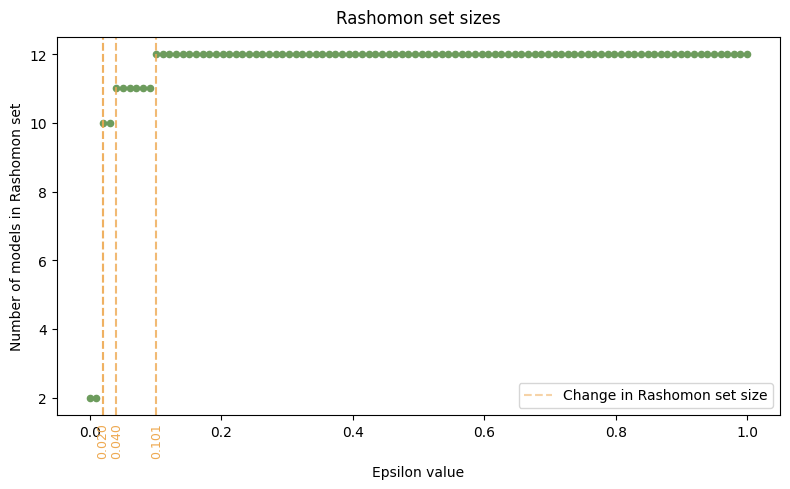

In [8]:
builder.preview_rashomon()

### Set epsilon based on the preview plot

In [9]:
builder.set_epsilon(0.06)

### Launch pipeline  and visualize the dashboard

In [10]:
rashomon_set, visualizer = builder.build()

Building Pipeline...
Validating epsilon parameter...
Creating Rashomon Set and Visualizer...
Rashomon Set and Visualizer built successfully.
Closing all previous Streamlit processes...
Launching Streamlit dashboard...
Streamlit dashboard launched (PID=12472)
You can continue working with your code - to close Streamlit process call dashboard_close() method.


🛑 Killing Streamlit (PID=19480)
🛑 Killing Streamlit (PID=29024)


### Work on the Rashomon Set object 

As the dashboard application runs in the background, you are able to continue working on the returned RashomonSet and Visualizer objects.

In [11]:
print(rashomon_set.base_model)

RandomForestGini


In [12]:
print(f"Rashomon Rastio {rashomon_set.rashomon_ratio()}")

Rashomon Rastio 0.9166666666666666


### Remember to close streamlit dashboard after you are finished

To avoid zombie process runnuning in the background, after you are finished with your work, remember to call dashboard_close() which will kill all streamlit processes.

In [13]:
builder.dashboard_close()

🛑 Killing Streamlit (PID=12472)
🛑 Killing Streamlit (PID=26468)


## Build Rashomon Intersection pipeline from Converter results

Similarly, you can build the RashomonIntersection pipeline by providing slightly different parameters.

### Build pipeline

In [14]:
intersection_builder = BuildIntersectionFromConverted(converted_results_credit_path, ["precision_macro", "recall_micro"], custom_weights=[0.5, 0.5], weighted_sum_method='custom_weights')

Initializing Rashomon Intersection Builder...
Arguments validation...
Assigning attributes...
Rashomon Intersection Builder initialized.


### Preview properties:

The Visualizer received a leaderboard displayed below.
Check if this is the desired leaderboard for analysis, else change the given Path parameter
                  model  accuracy  balanced_accuracy  precision_macro  \
0      RandomForestGini  1.000000           1.000000         1.000000   
1      RandomForestEntr  1.000000           1.000000         1.000000   
2              LightGBM  0.969697           0.952381         0.986111   
3              CatBoost  0.969697           0.952381         0.986111   
4            LightGBMXT  0.969697           0.952381         0.986111   
5       NeuralNetFastAI  0.969697           0.952381         0.986111   
6               XGBoost  0.969697           0.952381         0.986111   
7   WeightedEnsemble_L2  0.969697           0.952381         0.986111   
8        ExtraTreesEntr  0.969697           0.952381         0.986111   
9        ExtraTreesGini  0.969697           0.952381         0.986111   
10       NeuralNetTorch  0.939394           0.9047

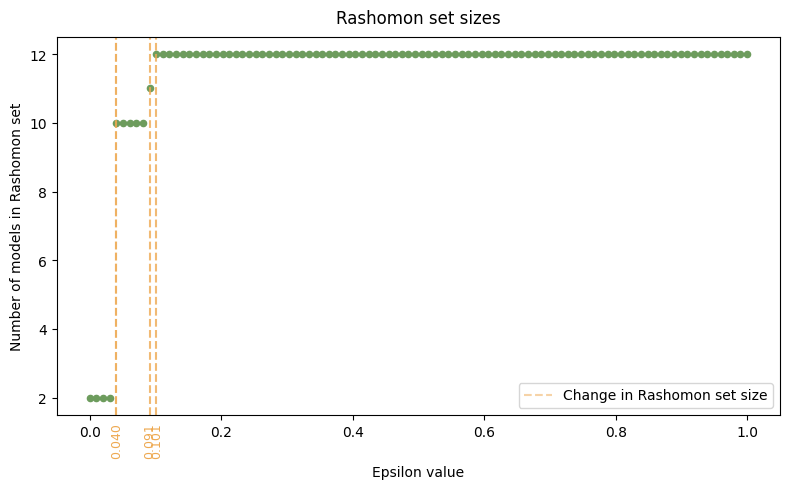

In [15]:
intersection_builder.preview_rashomon()

### Set epsilon based on the preview 

In [16]:
intersection_builder.set_epsilon(0.06)

### Launch pipeline and dashboard

In [17]:
intersection, visualizer = intersection_builder.build()

Building Pipeline...
Validating epsilon parameter...
Creating Rashomon Intersection and Visualizer...
Rashomon Intersection and Visualizer built successfully.
Closing all previous Streamlit processes...
Launching Streamlit dashboard...
Streamlit dashboard launched (PID=9564)
You can continue working with your code - to close Streamlit process call dashboard_close() method.


### Work on your code:

In [7]:
print(f"Base model found in the Intersection: {intersection.base_model}" )

Base model found in the Intersection: RandomForestGini


In [8]:
empty_plot, metrics = visualizer.base_metric_return()
print(f"Base metrics obtained from the IntersectionVisualizer: {metrics}")

Base metrics obtained from the IntersectionVisualizer: ['accuracy', 'recall_micro']


### Don't forget to close the dashboard

In [9]:
intersection_builder.dashboard_close()

🛑 Killing Streamlit (PID=3040)
🛑 Killing Streamlit (PID=6152)
